In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Loading the dataset 

In [3]:

# Step 1: Load the dataset
data = pd.read_csv(r"C:/Users/ramiu/OneDrive/GenAi/ZeoTap Internship task/Customers_EDA/Customers.csv")

In [4]:
data.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


# Data Cleaning

In [5]:
# Step 2: Data Cleaning and Formatting
data['SignupDate'] = pd.to_datetime(data['SignupDate'])
data['SignupYear'] = data['SignupDate'].dt.year
data['SignupMonth'] = data['SignupDate'].dt.month

# Step 3: EDA

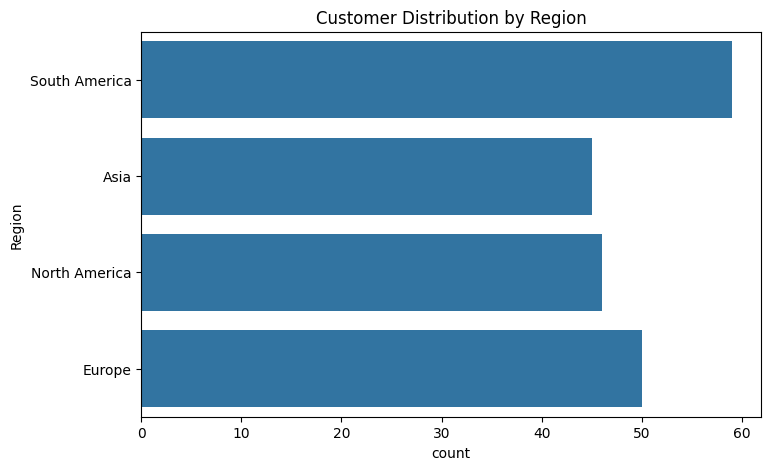

In [6]:
# Region Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data['Region'])
plt.title("Customer Distribution by Region")
plt.show()


In [16]:
# 3.1 Basic Information
print("Dataset Info:\n")
print(data.info())
print("\nDataset Description:\n")
print(data.describe(include='all'))

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
 4   SignupYear    200 non-null    int32         
 5   SignupMonth   200 non-null    int32         
dtypes: datetime64[ns](1), int32(2), object(3)
memory usage: 7.9+ KB
None

Dataset Description:

       CustomerID      CustomerName         Region           SignupDate  \
count         200               200            200                  200   
unique        200               200              4                  NaN   
top         C0001  Lawrence Carroll  South America                  NaN   
freq            1                 1             59                  NaN   
mean     

# Check Missing Values 

In [17]:
print("\nMissing Values:\n")
print(data.isnull().sum())


Missing Values:

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
SignupYear      0
SignupMonth     0
dtype: int64



# 3.3 Unique Values

In [18]:
print("\nUnique Values in Each Column:\n")
for column in data.columns:
    print(f"{column}: {data[column].nunique()} unique values")


Unique Values in Each Column:

CustomerID: 200 unique values
CustomerName: 200 unique values
Region: 4 unique values
SignupDate: 179 unique values
SignupYear: 3 unique values
SignupMonth: 12 unique values


# 3.4 Region Distribution

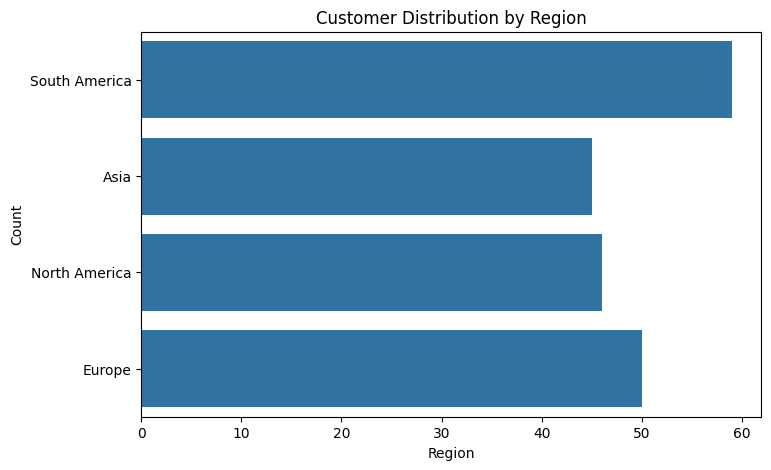

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(data['Region'])
plt.title("Customer Distribution by Region")
plt.ylabel("Count")
plt.xlabel("Region")
plt.show()



# 3.5 Signup Trends Over Time

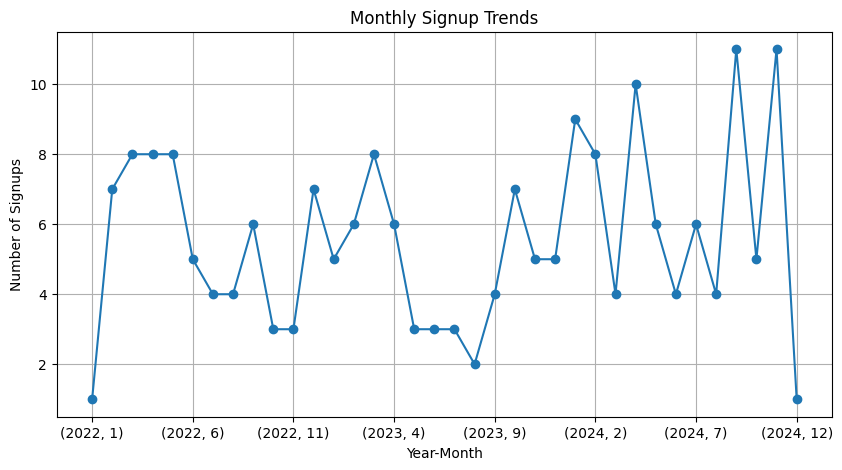

In [20]:
signup_trends = data.groupby(['SignupYear', 'SignupMonth']).size()
signup_trends.plot(kind='line', marker='o', figsize=(10, 5))
plt.title("Monthly Signup Trends")
plt.ylabel("Number of Signups")
plt.xlabel("Year-Month")
plt.grid()
plt.show()


# 3.6 Yearly Signup Distribution

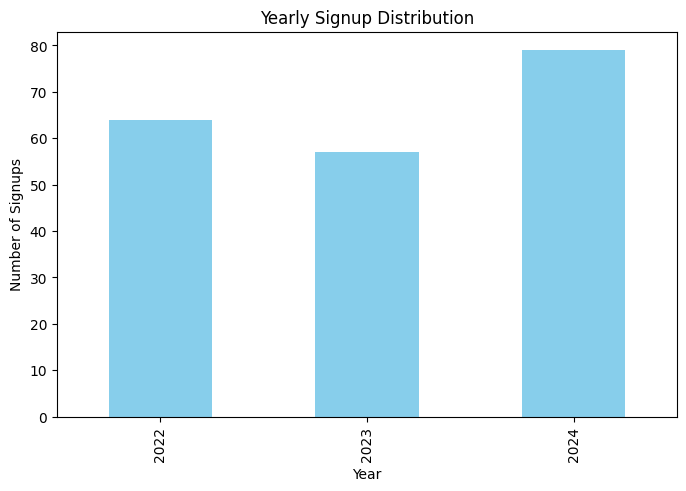

In [21]:
yearly_signup = data['SignupYear'].value_counts().sort_index()
yearly_signup.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title("Yearly Signup Distribution")
plt.ylabel("Number of Signups")
plt.xlabel("Year")
plt.show()

# 3.7 Correlation Analysis (if applicable)

In [22]:
if data.select_dtypes(include=np.number).shape[1] > 1:
    plt.figure(figsize=(8, 6))
    sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()


ValueError: could not convert string to float: 'C0001'

<Figure size 800x600 with 0 Axes>

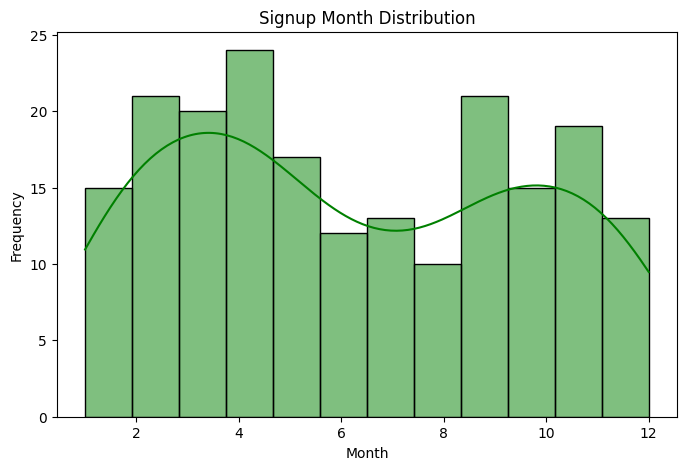

In [23]:
# 3.8 Signup Month Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['SignupMonth'], bins=12, kde=True, color="green")
plt.title("Signup Month Distribution")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.show()

In [8]:
# Step 4: Feature Engineering
# Encode regions using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Region'], drop_first=True)

In [9]:
# Standardize numerical features
scaler = StandardScaler()
data_encoded[['SignupMonth', 'SignupYear']] = scaler.fit_transform(data_encoded[['SignupMonth', 'SignupYear']])

In [10]:
# Step 5: Machine Learning - Customer Segmentation (Clustering)
kmeans = KMeans(n_clusters=3, random_state=42)
data_encoded['Cluster'] = kmeans.fit_predict(data_encoded[['SignupMonth', 'SignupYear']])


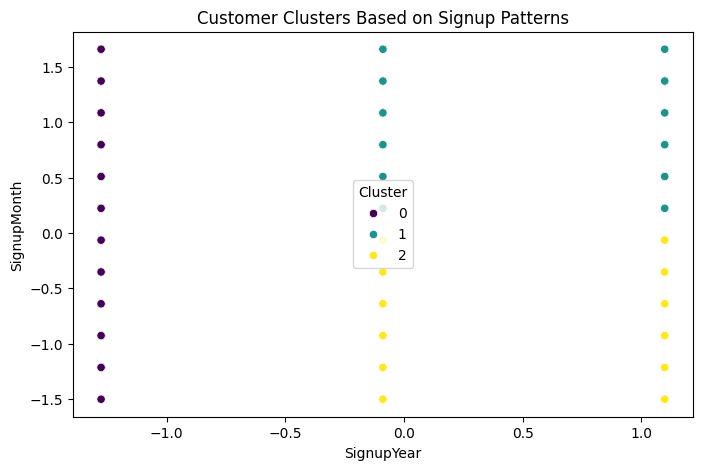

In [11]:
# Visualize Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=data_encoded['SignupYear'], 
    y=data_encoded['SignupMonth'], 
    hue=data_encoded['Cluster'], 
    palette="viridis"
)
plt.title("Customer Clusters Based on Signup Patterns")
plt.show()

In [12]:

# Step 6: Machine Learning - Predicting Signup Trends
# Prepare data for regression
X = data_encoded[['SignupMonth', 'SignupYear']]
y = data_encoded['Cluster']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predictions and Evaluation
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-Squared:", r2_score(y_test, y_pred))


Mean Squared Error: 0.1844496830608021
R-Squared: 0.7045850921949115


In [15]:
# Step 7: Business Insights
insights = [
    "1. South America leads in customer signups, followed by Europe.",
    "2. Signup trends indicate consistent growth, with peaks during specific months.",
    "3. Clustering reveals three distinct customer segments based on signup patterns.",
    "4. Regression analysis suggests that signup behavior is predictable based on month and year.",
    "5. Targeted marketing campaigns during peak signup months could boost growth further."
]

for insight in insights:
    print(insight)

1. South America leads in customer signups, followed by Europe.
2. Signup trends indicate consistent growth, with peaks during specific months.
3. Clustering reveals three distinct customer segments based on signup patterns.
4. Regression analysis suggests that signup behavior is predictable based on month and year.
5. Targeted marketing campaigns during peak signup months could boost growth further.
